In [1]:
import os
from pathlib import Path
import json
import linecache

import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num
import folium

In [2]:
DATA_PATH = Path('/data/safegraph/social-distancing/')
mobility_data_path = DATA_PATH / '2020/06/01/2020-06-01-social-distancing.csv'

In [3]:
time_series_case_counts_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

In [4]:
# https://github.com/obuchel/classification/blob/master/prepare_classification_counties_final.py
# See:  https://obuchel.github.io/classification/output/classification/classification_ids_counties2.json
# https://obuchel.github.io/classification/output/classification/classification_ids_counties2.json
# https://obuchel.github.io/classification/classification_map.html

In [5]:
case_counts_time_series = pd.read_csv(time_series_case_counts_url)

In [6]:
south_carolina_case_counts_time_series = case_counts_time_series[case_counts_time_series['Province_State'] == 'South Carolina']

In [7]:
south_carolina_case_counts_time_series = south_carolina_case_counts_time_series.astype({'FIPS': int}).set_index('FIPS')
south_carolina_case_counts_time_series.head()

,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
FIPS,,,,,,,,,,,,,,,,,,,,,
45001,84045001,US,USA,840,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",...,99,100,103,103,106,113,113,119,118,119
45003,84045003,US,USA,840,Aiken,South Carolina,US,33.543380,-81.636454,"Aiken, South Carolina, US",...,314,325,335,345,358,387,406,434,451,488
45005,84045005,US,USA,840,Allendale,South Carolina,US,32.988374,-81.353211,"Allendale, South Carolina, US",...,47,47,48,48,48,48,50,58,58,58
45007,84045007,US,USA,840,Anderson,South Carolina,US,34.518281,-82.639595,"Anderson, South Carolina, US",...,508,525,552,563,578,608,635,676,742,761
45009,84045009,US,USA,840,Bamberg,South Carolina,US,33.219276,-81.056600,"Bamberg, South Carolina, US",...,79,83,84,91,103,113,117,130,140,144


In [8]:
# south_carolina_case_counts_time_series.loc[45001:45003]

In [9]:
date_columns = [column_name for column_name in south_carolina_case_counts_time_series.columns if '/' in column_name]

In [10]:
matplotlib_dates = [datestr2num(date) for date in date_columns]
matplotlib_dates = [pd.to_datetime(date) for date in date_columns]
# matplotlib_dates

In [11]:
south_carolina_case_counts_time_series.T

FIPS,45001,45003,45005,45007,45009,45011,45013,45015,45017,45019,...,45077,45079,45081,45083,45085,45087,45089,45091,80045,90045
UID,84045001,84045003,84045005,84045007,84045009,84045011,84045013,84045015,84045017,84045019,...,84045077,84045079,84045081,84045083,84045085,84045087,84045089,84045091,84080045,84090045
iso2,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
Admin2,Abbeville,Aiken,Allendale,Anderson,Bamberg,Barnwell,Beaufort,Berkeley,Calhoun,Charleston,...,Pickens,Richland,Saluda,Spartanburg,Sumter,Union,Williamsburg,York,Out of SC,Unassigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/30/20,113,387,48,608,113,79,1223,1069,87,4027,...,835,3518,208,1609,1059,90,400,1204,0,0
7/1/20,113,406,50,635,117,82,1282,1170,99,4289,...,855,3632,215,1663,1080,91,412,1257,0,0
7/2/20,119,434,58,676,130,86,1325,1278,99,4615,...,896,3757,219,1767,1115,95,413,1301,0,0
7/3/20,118,451,58,742,140,88,1376,1392,103,5033,...,921,3866,224,1798,1158,98,421,1406,0,0


In [12]:
county_case_counts = south_carolina_case_counts_time_series[date_columns].T
county_case_counts

FIPS,45001,45003,45005,45007,45009,45011,45013,45015,45017,45019,...,45077,45079,45081,45083,45085,45087,45089,45091,80045,90045
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/30/20,113,387,48,608,113,79,1223,1069,87,4027,...,835,3518,208,1609,1059,90,400,1204,0,0
7/1/20,113,406,50,635,117,82,1282,1170,99,4289,...,855,3632,215,1663,1080,91,412,1257,0,0
7/2/20,119,434,58,676,130,86,1325,1278,99,4615,...,896,3757,219,1767,1115,95,413,1301,0,0
7/3/20,118,451,58,742,140,88,1376,1392,103,5033,...,921,3866,224,1798,1158,98,421,1406,0,0


In [13]:
county_case_counts[[45001, 45003]]

FIPS,45001,45003
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
6/30/20,113,387
7/1/20,113,406
7/2/20,119,434
7/3/20,118,451


In [15]:
#plt.clf()
#cols = 5
#rows = int(len(county_case_counts) / cols) + 1

#figsize=(4, 2)

#print('starting')
#fig, axs = plt.subplots(rows, cols, figsize=figsize, sharex='all', sharey='all')
#print('done')

#fig

45001 - Abbeville


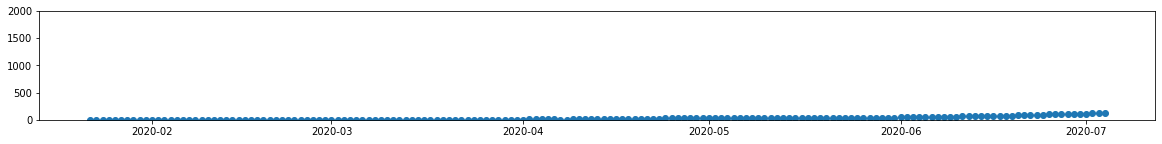

45003 - Aiken


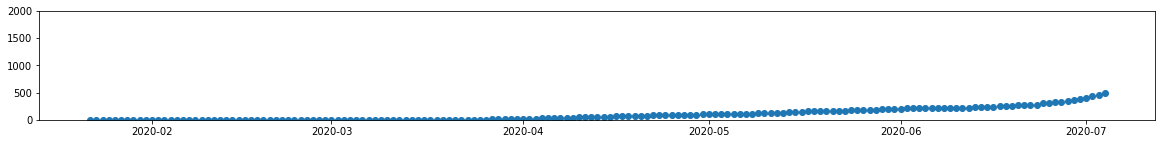

45005 - Allendale


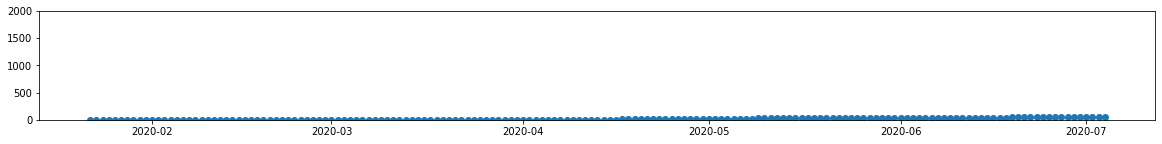

45007 - Anderson


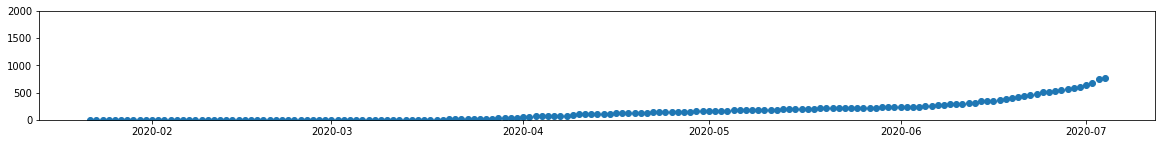

45009 - Bamberg


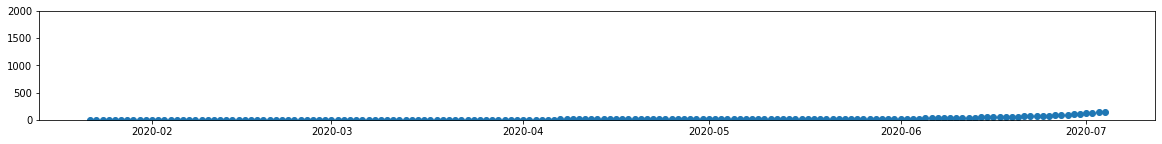

45011 - Barnwell


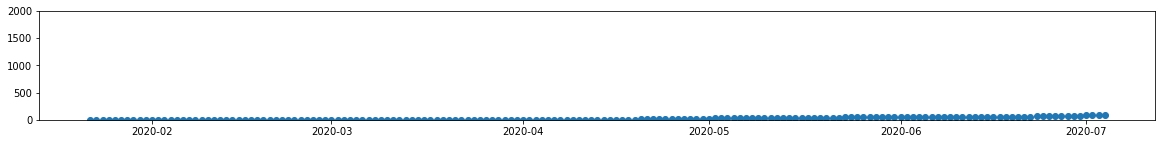

45013 - Beaufort


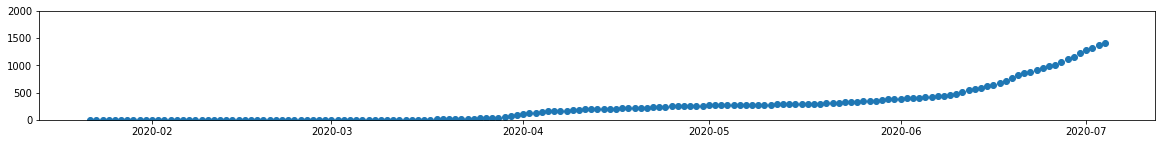

45015 - Berkeley


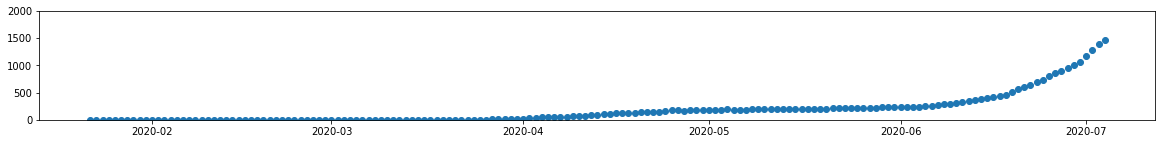

45017 - Calhoun


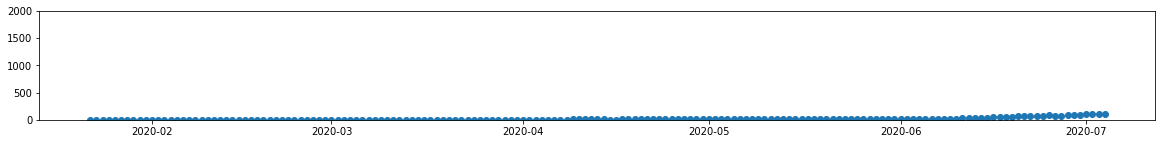

45019 - Charleston


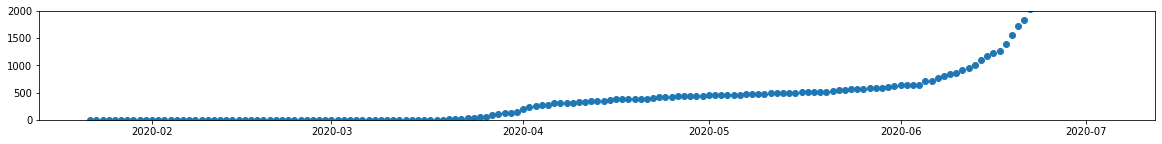

45021 - Cherokee


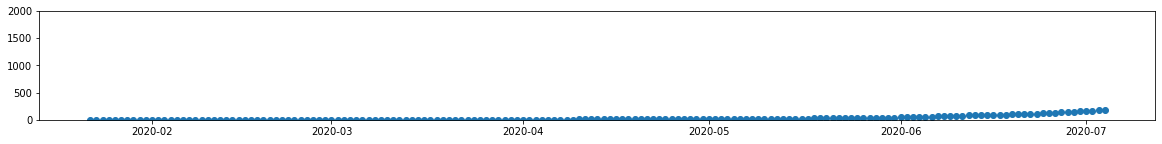

45023 - Chester


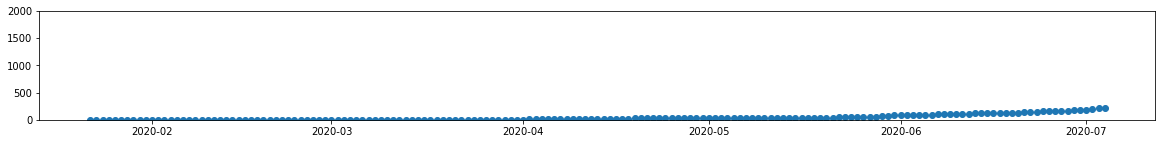

45025 - Chesterfield


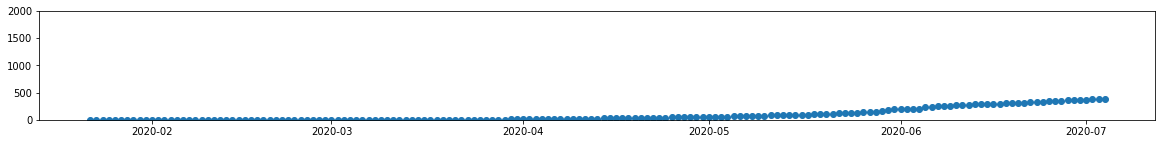

45027 - Clarendon


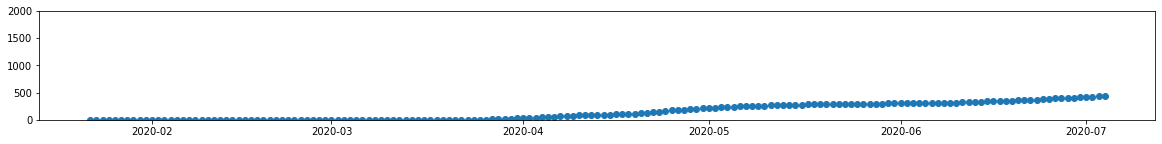

45029 - Colleton


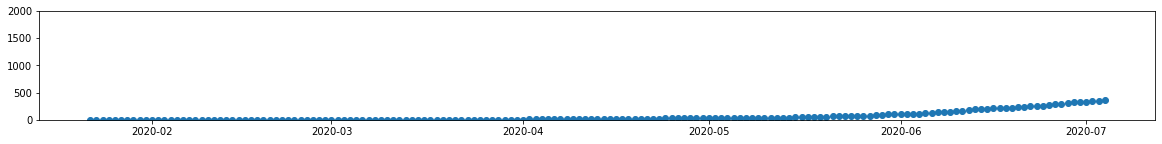

45031 - Darlington


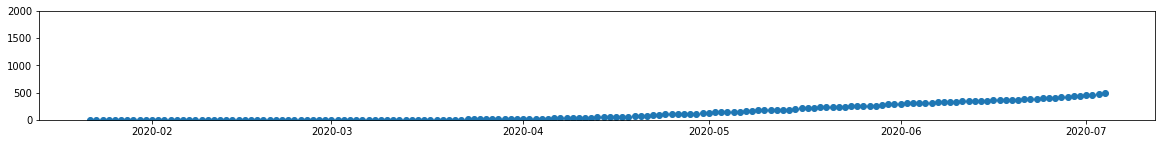

45033 - Dillon


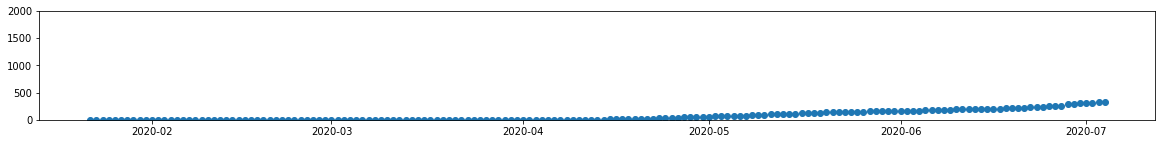

45035 - Dorchester


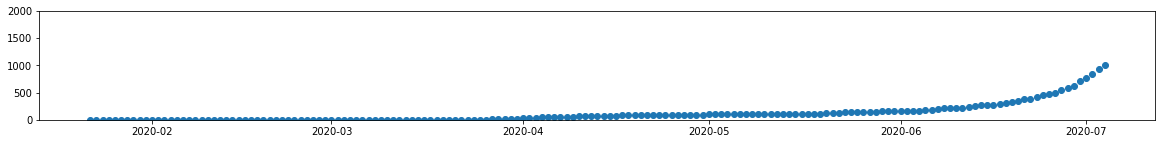

45037 - Edgefield


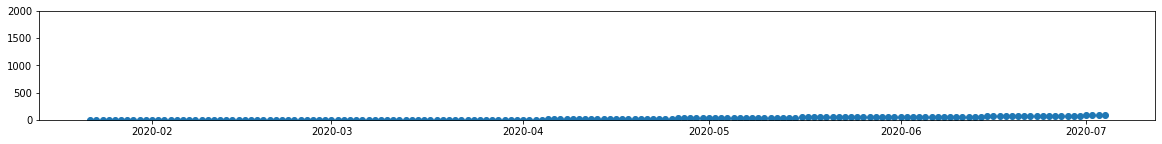

45039 - Fairfield


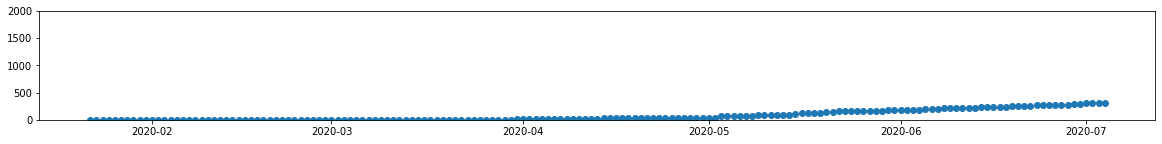

45041 - Florence


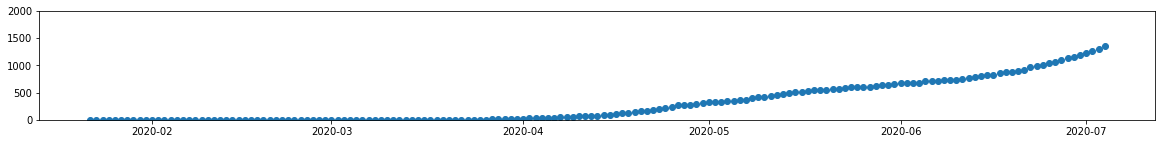

45043 - Georgetown


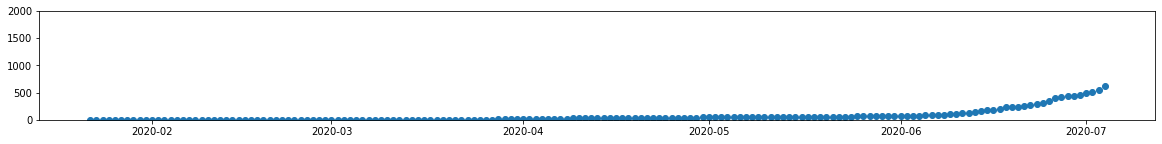

45045 - Greenville


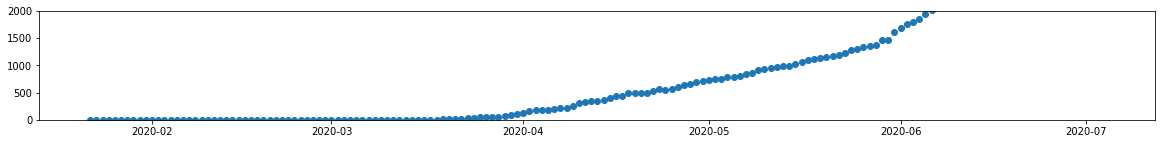

45047 - Greenwood


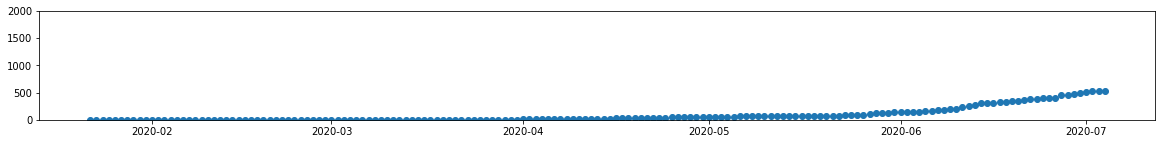

45049 - Hampton


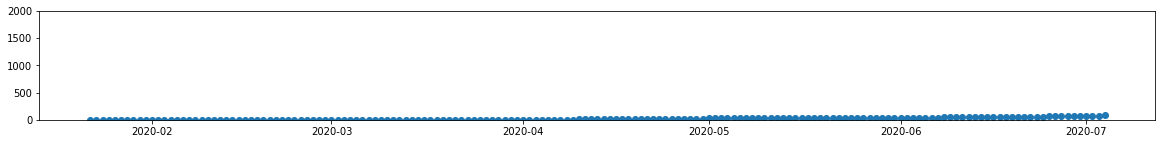

45051 - Horry


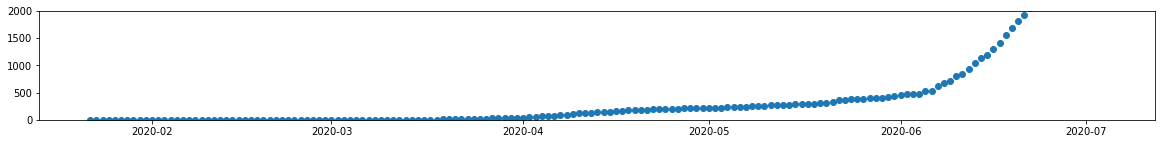

45053 - Jasper


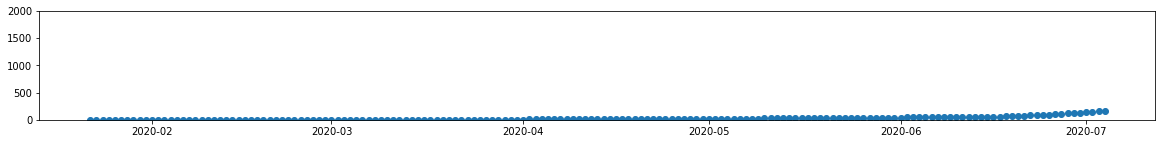

In [ ]:
#fig.suptitle('Case Counts by County')
figsize=(20, 2)

for i, county_fips in enumerate(county_case_counts): # [[45001, 45003]]
    #fig, ax = plt.subplots()
    #print(i)
    print(str(county_fips) + ' - ' + south_carolina_case_counts_time_series.loc[county_fips]['Admin2'])
    
    case_counts = list(county_case_counts[county_fips])
    
    plt.figure(figsize=figsize)
    plt.ylim(0, 2000)
    # plt.yscale('log')
    plt.plot_date(matplotlib_dates, case_counts)
    plt.show()
    plt.close()

In [111]:
plt.show()

In [116]:
list(enumerate(county_case_counts[[45001, 45003]]))

[(0, 45001), (1, 45003)]

In [128]:
len(county_case_counts)

165